In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt


['state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 's

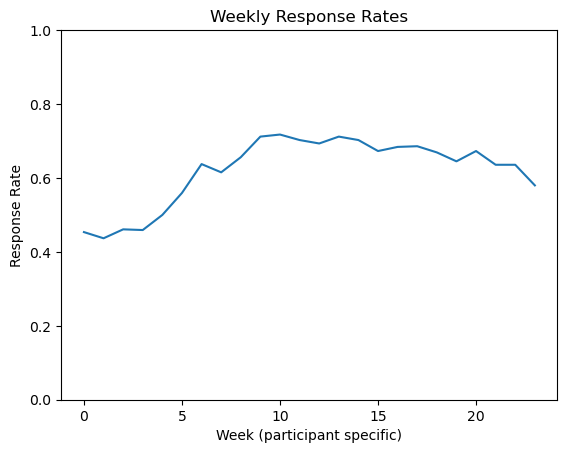

<Figure size 640x480 with 0 Axes>

In [8]:
elem_map = [
      "Healthy Fruits",
      "Healthy Vegetables",
      "Healthy Snacks/Breakfast",
      "Healthy Other",
      "Unhealthy Tobacco",
      "Unhealthy Alcohol",
      "Unhealthy Restaurant",
      "Unhealthy Junk",
      "Fitness Overall",
      "Fitness Sports",
      "Fitness Gym",
      "Fitness Walking",
      "Cause Knowledge Overall",
      "Cause Weight",
      "Cause Diet",
      "Cause Exercise",
      "Complication Knowledge"
]

np.random.seed(0)
torch.manual_seed(0)
bd = BehaviorData(top_respond_perc=0.5, minw=2, maxw=31, include_state=True, include_pid=False, full_questionnaire=True, expanded_states=True, full_sequence=False, split_weekly_questions=True, split_model_features=True)
# print(bd.data["qids"].counts)
counts = bd.get_weekly_response_rates()
consumptionRows = (torch.where(bd.features[:, -1] == 0, 1, 0) * torch.where(bd.features[:, -2] == 0, 1, 0)).nonzero()

print("Consumption:", consumptionRows.shape[0])

consumptionRows = (torch.where(bd.features[:, -1] == 1, 1, 0) * torch.where(bd.features[:, -2] == 0, 1, 0)).nonzero()
print("Exercise:", consumptionRows.shape[0])
                   
consumptionRows = (torch.where(bd.features[:, -1] == 0, 1, 0) * torch.where(bd.features[:, -2] == 1, 1, 0)).nonzero()
print("Knowledge:", consumptionRows.shape[0])
splot = plt.plot(counts)

rlvllist = []
rlvls = np.array(bd.data["response"])
for rlvl in rlvls:
    rlvllist.append(rlvl[0])
    rlvllist.append(rlvl[1])
rlvllist = np.array(rlvllist)

sidlist = []
sids = np.array(bd.data["paction_sids"])
for sid in sids:
    sidlist.append(sid[0])
    sidlist.append(sid[1])
sidlist = np.array(sidlist)
    
conRs = rlvllist[sidlist < 9]
mask = (sidlist < 13) & (sidlist > 8)
exerRs = rlvllist[mask]
knowRs = rlvllist[sidlist > 12]
vals, counts = np.unique(conRs, return_counts=True)
print("Consumption Response Levels:", counts[1:])
vals, counts = np.unique(exerRs, return_counts=True)
print("Exercise Response Levels:", counts[1:])
vals, counts = np.unique(knowRs, return_counts=True)
print("Knowledge Response Levels:", counts[1:])    
    
vals, counts = np.unique(sidlist, return_counts=True)
# print(vals)
# print(counts.sum())
for val, count in zip(vals, counts):
    print(f"{elem_map[val - 1]:30}:\t{count}")

plt.ylabel("Response Rate")
plt.ylim(0, 1)
plt.xlabel("Week (participant specific)")
plt.title("Weekly Response Rates")
plt.show()
plt.clf()

In [3]:
# percs = bd.counts / 56
print(bd.responseIdx)
print(bd.featureList)
print(bd.data['pid'][0])
temp = bd.data[bd.data["pid"] == 146518]
print(temp['state'][0])
print(temp['response'])
print(temp['qids'])
print(temp['pmsg_ids'])
print(temp['paction_sids'])
totalFeat = None
print(bd.chunkedFeatures[-1][0, -12:])
for feat in bd.chunkedFeatures:
    if totalFeat is None:
        totalFeat = feat.clone()
    else:
        totalFeat += feat
print(totalFeat.std(axis=0))

184
['state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state

KeyError: 0

In [ ]:
tests = []
trains = []
for item in bd.test:
    tests.append(bd.features[item].numpy())
for item in bd.train:
    trains.append(bd.features[item].numpy())

tests = np.array(tests)
trains = np.array(trains)
print(tests.shape, trains.shape)

x, y = 10, 1
splot = plt.scatter(trains[:, x], trains[:, y], label=f"Train")
splot = plt.scatter(tests[:, x], tests[:, y], label=f"Test")
plt.title("Train/Test Distribution Checking")
plt.legend()
plt.ylabel(f"Feature {y}")
plt.xlabel(f"Feature {x}")
plt.show()
plt.savefig("simpleNotebookDistPlot.png")
plt.clf()

splot = plt.boxplot([trains[:, x], tests[:, x]], labels=["Train", "Test"])
plt.legend()
plt.ylabel(f"Feature {x}")
plt.show()
plt.savefig("simpleNotebookBoxPlot.png")
plt.clf()


In [ ]:
print("Percent of participants with 0 responses:", (percs[percs == 0].count()) / len(percs))
print("Percent of participants with >0 responses:", (percs[percs != 0].count()) / len(percs))

plt.hist(percs)
plt.ylabel("No. Participants")
plt.xlabel("Response %")
plt.show()

plt.clf()
plt.ylabel("Response %")
asdf = plt.boxplot(percs)
plt.show()
print(percs.quantile([.1, .25, .53, .6, .65, .70, .75, .9]))

In [ ]:
print(bd.featureList)